In [4]:
import numpy as np
import pathlib as pl
import os 
import pandas as pd
import matplotlib.pyplot as plt

# Lift Charts for University Rank Regression

In this notebook we are going to be looking at lift charts for rank regression problems. The data you will be using is from the [Times World University Rankings](https://www.timeshighereducation.com/world-university-rankings/2022/world-ranking#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats) from 2016. 

You will be plotting lift charts to compare how well the number of students, student-staff ratio and research ranking predicts the overall ranking of the university. The data has already been converted into rankings for each of these categories. 

## Load Data

In [5]:
path_csv = pl.Path(os.getcwd()) / f'IMP-PCMLAI-M6-Uni_Ranking.csv'
with open(path_csv, 'rb') as file:
    data = pd.read_csv(file)

# the cols parameter gives you the list list ['research_rank', 'student_staff_ratio_rank', 'num_students_rank']
cols = list(data.columns) 
cols.remove('university_name')
cols.remove('world_rank')
cols.remove('Unnamed: 0')

print(data)
print(cols)


     Unnamed: 0  research_rank  student_staff_ratio_rank  num_students_rank  \
0           169            182                       190                  1   
1            30             54                       150                  2   
2           158            187                       193                  3   
3           133            173                       182                  4   
4            47             55                        71                  5   
..          ...            ...                       ...                ...   
195         174            113                         3                196   
196         163            186                        57                197   
197         128            169                       157                198   
198          22             27                       199                199   
199         132            115                       200                200   

     world_rank                                   u

## Section 1: Plot the lift chart for number of students

### TO DO: Plot the Lift Chart for the number of students

Remember to include the average classifier, perfect classifier and a legend for your plot. 

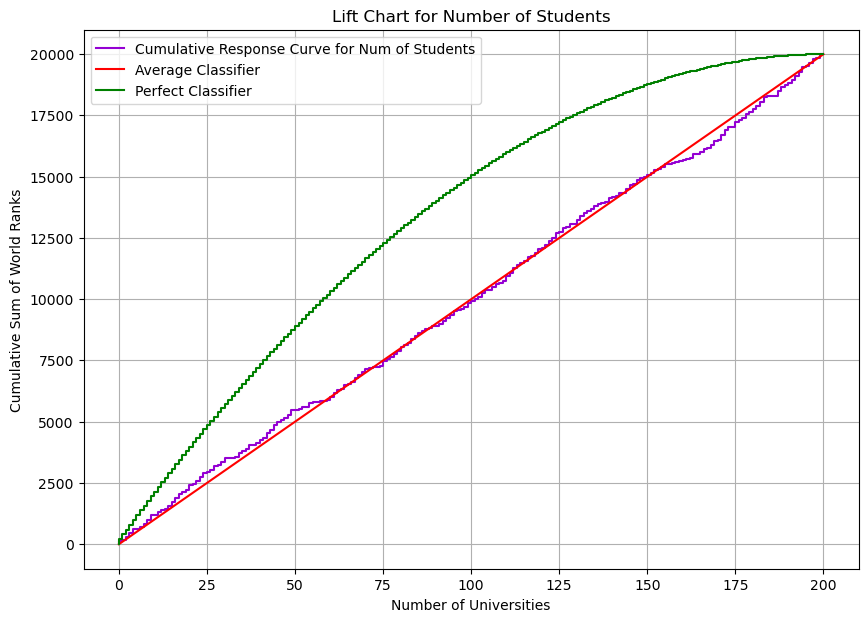

In [8]:
#### ANSWER ###
# Sort the data by 'num_students_rank'
data_sorted_num_students_rank = data.sort_values(by='num_students_rank', ascending=False)

# Sort the data by 'world_rank'
perf = data.sort_values(by='world_rank', ascending=False)

# Computing the cumulative sum of the world ranks for the sorted data
cumulative = data_sorted_num_students_rank['world_rank'].cumsum()

# Compute the cumulative sum of students
perf_cumulative = perf['world_rank'].cumsum()

#The cumulative sums are concatenated with an initial value of 0 to ensure the step plot starts from zero.
cumulative = np.concatenate([np.array([0]), cumulative])
perf_cumulative = np.concatenate([np.array([0]), perf_cumulative])

#print(f'cumulative_world_rank.iloc[-1]= {cumulative_world_rank.iloc[-1]} and len(cumulative_world_rank)={len(cumulative_world_rank)}')
# Compute the average classifier; average rate across all selections
avg_classifier_1 = np.linspace(0, perf_cumulative[-1], len(perf_cumulative))

# Plot
plt.figure(figsize=(10, 7))

# Plot the cumulative response curve 
plt.step(range(len(cumulative)), cumulative, label='Cumulative Response Curve for Num of Students',color='darkviolet')

# Plot the average classifier 
plt.plot(avg_classifier_1, 'red', label='Average Classifier')

#plots the 'Perfect Classifier' using the cumulative values from the perf DataFrame.
plt.step(range(len(perf_cumulative)), perf_cumulative, 'green', label='Perfect Classifier')


plt.xlabel('Number of Universities')
plt.ylabel('Cumulative Sum of World Ranks')
plt.title('Lift Chart for Number of Students')

#automatically choose the "best" location for the legend so that it doesn't overlap with the plotted data if possible. 
#Other options for loc include places like 'upper right', 'lower left', 'center',
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Section 2: Plot the Lift Charts for All the Models

### TO DO: Plot the lift charts for models 1, 2 & 3 on the same graph. Don't forget to include the perfect and average classifiers and include a legend in your plot. 

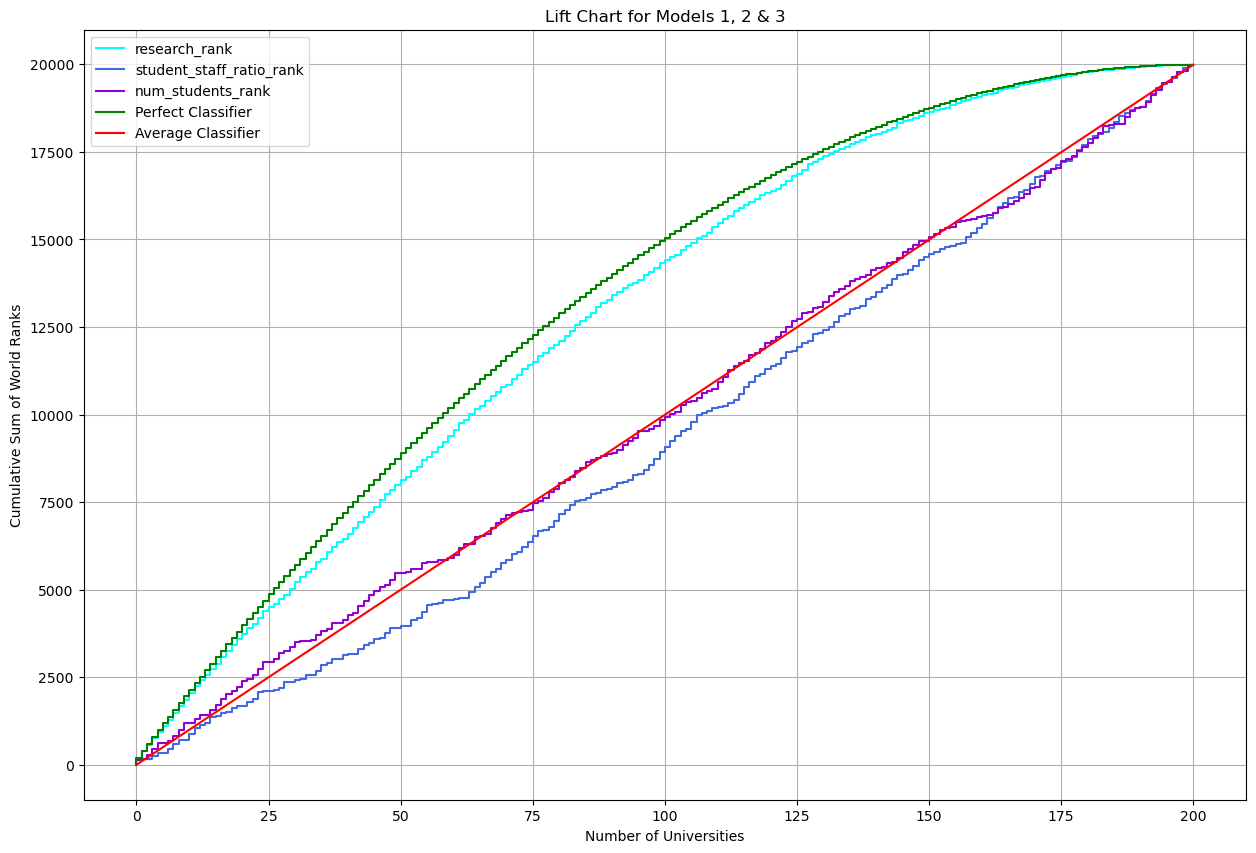

In [10]:
### ANSWER ####

models = cols
colors=['cyan','royalblue','darkviolet']

plt.figure(figsize=(15,10))

for idx, model in enumerate(models):
    #extract model and 'world_rank'
    model_df = data[[model, 'world_rank']]

    #Step 1: Sort validation records by decreasing predicted outcome value.
    # Sort the data by 'research_rank', 'student_staff_ratio_rank', or 'num_students_rank'
    model_df = model_df.sort_values(by=model, ascending=False)
    # Sort the data by 'world_rank'
    perf = model_df.sort_values(by='world_rank', ascending=False)
    
    #Step 2: Plot the point (i, cumulative sum of actual outcome values in the validation records {1…i}).
    model_df['cumulative'] = model_df['world_rank'].cumsum()
    perf['cumulative'] = perf['world_rank'].cumsum()    

    #The cumulative sums are concatenated with an initial value of 0. This is done to ensure the step plot starts from zero.
    cumulative = np.concatenate([np.array([0]), model_df['cumulative'].to_numpy()])
    cumulative_perf = np.concatenate([np.array([0]), perf['cumulative'].to_numpy()])

    #Plots the cumulative values for the current model using a step plot.
    plt.step(range(len(model_df)+1), cumulative, label=model,color=colors[idx])

#plots the 'Perfect Classifier' using the cumulative values from the perf DataFrame.
plt.step(range(len(cumulative_perf)), cumulative_perf, 'green', label='Perfect Classifier')

#'average classifier' with points (i, i * average outcome over all validation records
plt.plot(np.array([0, 200]), np.array([0, np.sum(data['world_rank'])]),'red', label='Average Classifier')

plt.xlabel('Number of Universities')
plt.ylabel('Cumulative Sum of World Ranks')
plt.title('Lift Chart for Models 1, 2 & 3')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### TO DO: Now answer the questions in insendi that apply to this notebook 